## Inventory Dynamics

#### John Stachurski

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Sample Paths and Joint Distributions

Consider a firm with inventory $X_t$

Wait till $X_t \leq s$, then order $S$ units

Firm faces stochastic demand $D_{t+1}$, where $\{D_t\}$ is independent with common distribution $\phi$

Inventory follows


\begin{equation*}
  X_{t+1} = 
  \begin{cases}
      ( S - D_{t+1})^+ & \quad \text{if } X_t \leq s \\
      ( X_t - D_{t+1} )^+ &  \quad \text{if } X_t > s
  \end{cases}
\end{equation*}


Here $a^+ := \max\{a, 0\}$

We'll assume that $\phi$ is the geometric distribution, so that

$$ \mathbb P \{D_t = d\} = (1 - p)^d p $$

for $d = 0, 1, \ldots$.  Here $p$ is a parameter in $(0, 1)$.

In [2]:
s, S = 10, 100
p = 0.4

def ϕ():
    return np.random.geometric(p) - 1

def G(x, d):
    if x <= s:
        return max(S - d, 0)
    else:
        return max(x - d, 0)
    

A first simulation:

In [3]:
sim_length = 100
X = np.empty(sim_length)
X[0] = 50

for t in range(sim_length-1):
    D = ϕ()
    X[t+1] = G(X[t], D)

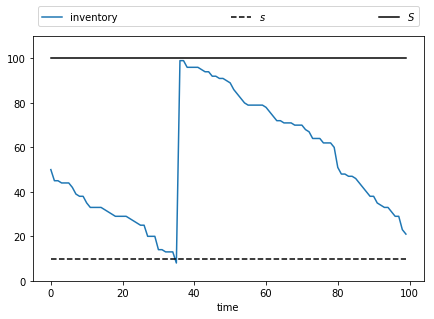

In [4]:
fig, ax = plt.subplots(figsize=(7, 4.5))
bbox = (0., 1.02, 1., .102)
legend_args = {'ncol': 3,
               'bbox_to_anchor': bbox,
               'loc': 3,
               'mode': 'expand'}

ax.plot(X, label="inventory")
ax.plot(s * np.ones(sim_length), 'k--', label="$s$")
ax.plot(S * np.ones(sim_length), 'k-', label="$S$")
ax.set_ylim(0, S+10)
ax.set_xlabel("time")
ax.legend(**legend_args)

plt.show()

Let's make a function for simulating paths

In [5]:
def sim_inventory_path(initial_x=50, sim_length=100):
    X = np.empty(sim_length)
    X[0] = 50

    for t in range(sim_length-1):
        D = ϕ()
        X[t+1] = G(X[t], D)
    
    return X

Simulate multiple paths:

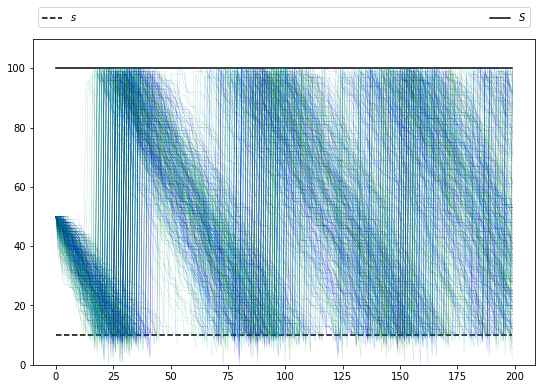

In [6]:
sim_length=200
fig, ax = plt.subplots(figsize=(9, 6))
bbox = (0., 1.02, 1., .102)
legend_args = {'ncol': 3,
               'bbox_to_anchor': bbox,
               'loc': 3,
               'mode': 'expand'}

ax.plot(s * np.ones(sim_length), 'k--', label="$s$")
ax.plot(S * np.ones(sim_length), 'k-', label="$S$")
ax.set_ylim(0, S+10)
ax.legend(**legend_args)

for i in range(400):
    rcolor = random.choice(('c', 'g', 'b'))
    X = sim_inventory_path(sim_length=sim_length)
    ax.plot(X, color=rcolor, alpha=0.2, lw=0.5)

plt.show()

What's the probability that we need to order twice or more in the first 50 periods?

In [7]:
sim_length = 50
M = 100_000  
counter = 0

for m in range(M):
    X = sim_inventory_path(sim_length=50)
    if sum(X <= s) > 1:
        counter += 1
        
print(f"Frequency of at least two stock outs = {counter / M}")

Frequency of at least two stock outs = 9e-05


### Marginal Distributions

Now let's look at the marginal distribution $\psi_T$ for some fixed $T$.

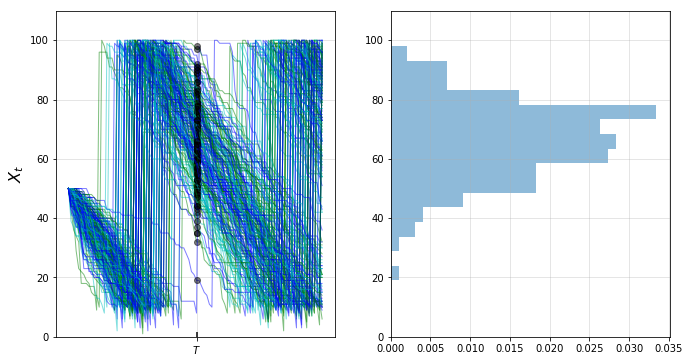

In [8]:
T = 50
M = 200

ymin, ymax = 0, S + 10

fig, axes = plt.subplots(1, 2, figsize=(11, 6))

for ax in axes:
    ax.grid(alpha=0.4)

ax = axes[0]

ax.set_ylim(ymin, ymax)
ax.set_ylabel('$X_t$', fontsize=16)
ax.vlines((T,), -1.5, 1.5)

ax.set_xticks((T,))
ax.set_xticklabels((r'$T$',))

sample = np.empty(M)
for m in range(M):
    rcolor = random.choice(('c', 'g', 'b'))
    X = sim_inventory_path(sim_length=2 * T)
    ax.plot(X, color=rcolor, lw=1, alpha=0.5)
    ax.plot((T,), (X[T+1],), 'ko', alpha=0.5)
    sample[m] = X[T+1]

axes[1].set_ylim(ymin, ymax)

axes[1].hist(sample, 
             bins=16, 
             density=True, 
             orientation='horizontal', 
             histtype='bar',
             alpha=0.5)

plt.show()

We can build up a clearer picture by drawing more samples

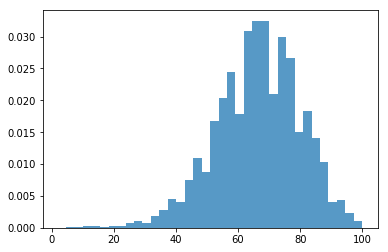

In [9]:
T = 50
M = 50_000

fig, ax = plt.subplots()

sample = np.empty(M)
for m in range(M):
    X = sim_inventory_path(sim_length=T+1)
    sample[m] = X[T]

ax.hist(sample, 
         bins=36, 
         density=True, 
         histtype='bar',
         alpha=0.75)

plt.show()

We can also approximate the distribution using a kernel density estimator.  I'll use one from Scikit Learn.



In [10]:
from sklearn.neighbors import KernelDensity

def plot_kde(sample, ax, label=''):
    
    xmin, xmax = 0.9 * min(sample), 1.1 * max(sample)
    xgrid = np.linspace(xmin, xmax, 200)
    kde = KernelDensity(kernel='gaussian').fit(sample[:, None])
    log_dens = kde.score_samples(xgrid[:, None])

    ax.plot(xgrid, np.exp(log_dens), label=label)

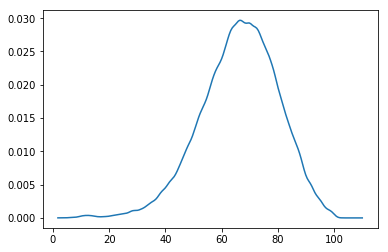

In [11]:
fig, ax = plt.subplots()
plot_kde(sample, ax)
plt.show()

### Asymptotic Stationarity and Ergodicity

This model is asymptotically stationary, with a unique stationary distribution.  

In particular, the sequence of marginal distributions $\{\psi_t\}$ is converging to a unique limiting distribution that does not depend on initial conditions.

### Exercise

Generate and plot the sequence $\{\psi_t\}$ at times $t = 10, 50, 200, 300, 400$ using the code above.

You should see convergence.  Try different initial conditions to verify that, in the long run, the distribution is invariant across initial conditions.

In [12]:
for i in range(40):
    print("solution below!")

solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!
solution below!


#### Solution

Here's one possible solution:

In [13]:
M = 50_000  # Number of paths
T = 501
X = np.empty((M, T))

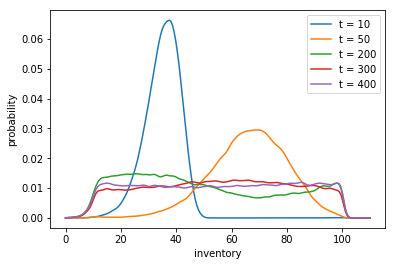

In [14]:
for m in range(M):
    X[m, :] = sim_inventory_path(sim_length=T)

fig, ax = plt.subplots()
sample_dates = 10, 50, 200, 300, 400

for t in sample_dates:
    plot_kde(X[:, t], ax, label=f't = {t}')

ax.set_xlabel('inventory')
ax.set_ylabel('probability')
ax.legend()
plt.show()

Notice that by $t=300$ or $t=400$ the densities are barely changing.

We have reached a good approximation of the stationary density.

You can convince yourself that initial conditions don't matter by testing a few of them.

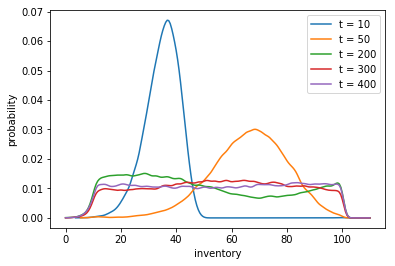

In [16]:
for m in range(M):
    X[m, :] = sim_inventory_path(sim_length=T, initial_x=80)

fig, ax = plt.subplots()
sample_dates = 10, 50, 200, 300, 400

for t in sample_dates:
    plot_kde(X[:, t], ax, label=f't = {t}')

ax.set_xlabel('inventory')
ax.set_ylabel('probability')
ax.legend()
plt.show()